# **Data Cleaning Notebook**

## Objectives

* Prepare the data sets for further analysis.
* Load and inspect the data prepared during data collection.
* Data Cleaning.
* Conclusion and next steps.

## Inputs

* /outputs/datasets/collection/breast-cancer.csv

## Outputs

* Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned

## Additional Comments

* As previously mentioned this projects relays on the guidelines provided in the walk through projects, and the lessons provided along the course (especially in the Predictive Analysis)
* Therefore, this notebook will be relating the Data Preparation step of Crisp-DM methodology.
* ***Don't forget Garbage In, Garbage out.***


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\stazr\\OneDrive\\Documents\\vscode-projects\\PP5-breast-cancer-diagnosis-new\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\stazr\\OneDrive\\Documents\\vscode-projects\\PP5-breast-cancer-diagnosis-new'

# Load Collected Data

In [4]:
import pandas as pd
df = pd.read_csv('outputs/datasets/collection/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Exploration

We will check the distribution and shape from a variable with missing data.

In [5]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

[]

In [6]:
def df_describe(df):
    # Basic stats
    print("Shape:", df.shape)
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isna().sum())
    print("\nDescriptive Stats:\n", df.describe(include='all'))
    print("\nSample:\n", df.head())

df_describe(df)

Shape: (569, 32)

Data Types:
 id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst       

We notice that there are no variables with missing data.

# Correlation and PPS Analysis

* We will create a function that is in compliance with updated pandas and ppscore.
* This will get rid of any deprecated warning that may come.

In [7]:
from pandas.api.types import CategoricalDtype
import ppscore.calculation as pps_calc

def _is_categorical_dtype(series):
    """
    Check if a pandas Series is of categorical dtype.
    This fixes the PPS deprecation warning.
    """
    return isinstance(series.dtype, CategoricalDtype)

pps_calc.is_categorical_dtype = _is_categorical_dtype

C:\Users\stazr\AppData\Roaming\Python\Python312\site-packages\ppscore\__init__.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [8]:
%matplotlib inline
# This line is used to display plots inline in Jupyter notebooks

In the following code cell we will -
* Create a function to plot a heatmap to visualize spearman and pearson correlations among the variables.
* Create a function to plot a heatmap to visualize Power Predictive Score (PPS) among the variables.
* Create a function to calculate correlation and PPS.
* Create a function to display the heatmaps ini succession.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 15), font_annot=10, rotation=45):
    """
    Plot a heatmap for the correlation matrix.
    Used to visualize spearman and pearson correlations.
    """
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, fmt=".2f", xticklabels=True, yticklabels=True,
                    mask=mask, cmap='plasma_r', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5, cbar_kws={'shrink': 0.5})
        axes.set_yticklabels(df.columns, rotation=0)
        axes.set_xticklabels(df.columns, rotation=rotation, ha='right')
        plt.ylim(len(df.columns), 0)
        plt.tight_layout()
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 15), font_annot=10, rotation=45):
    """
    Plot a heatmap for the Power Predictive Score (PPS) matrix.
    Used to visualize the predictive power of features.
    """
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, fmt=".2f", xticklabels=True, yticklabels=True,
                    mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                    linewidth=0.05, linecolor='grey', cbar_kws={'shrink': 0.5})
        ax.set_yticklabels(df.columns, rotation=0)
        ax.set_xticklabels(df.columns, rotation=rotation, ha='right')
        plt.ylim(len(df.columns), 0)
        plt.tight_layout()
        plt.show()


def CalculateCorrAndPPS(df):
    """
    Calculate correlation and Power Predictive Score (PPS) matrices.
    """
    df_corr_spearman = df.corr(method="spearman", numeric_only=True)
    df_corr_pearson = df.corr(method="pearson", numeric_only=True)

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                    figsize=(20, 12), font_annot=8):
    """
    Display the correlation and PPS heatmaps.
    """
    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
        f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

### Calculate Correlations and Power Predictive Score

In [10]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%  75%    max
ppscore  992.0  0.066  0.172  0.0  0.0  0.0  0.0  0.959


### Display Heatmaps



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



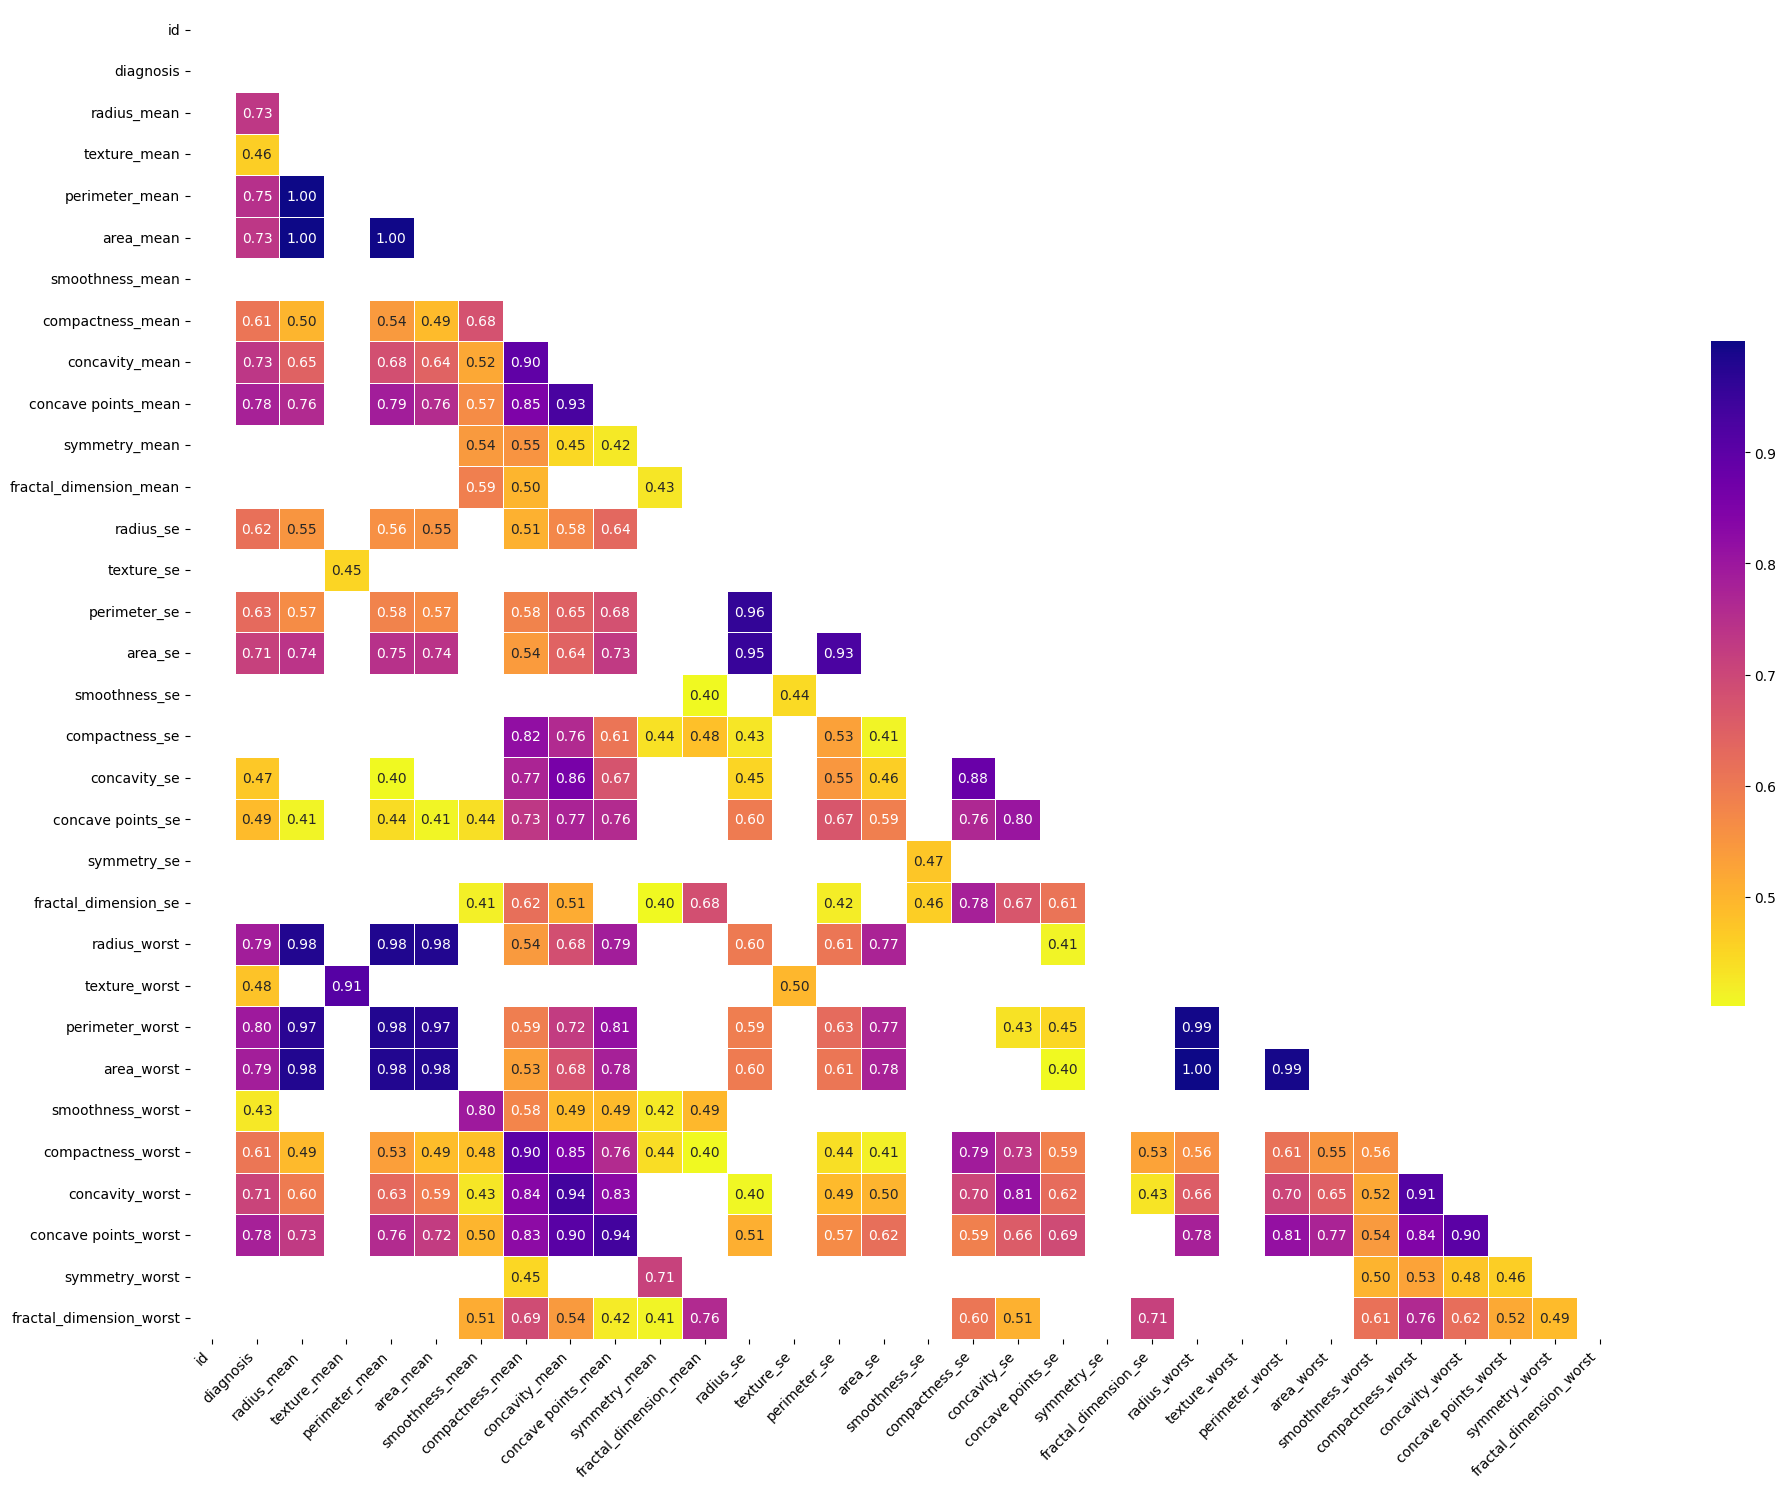



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



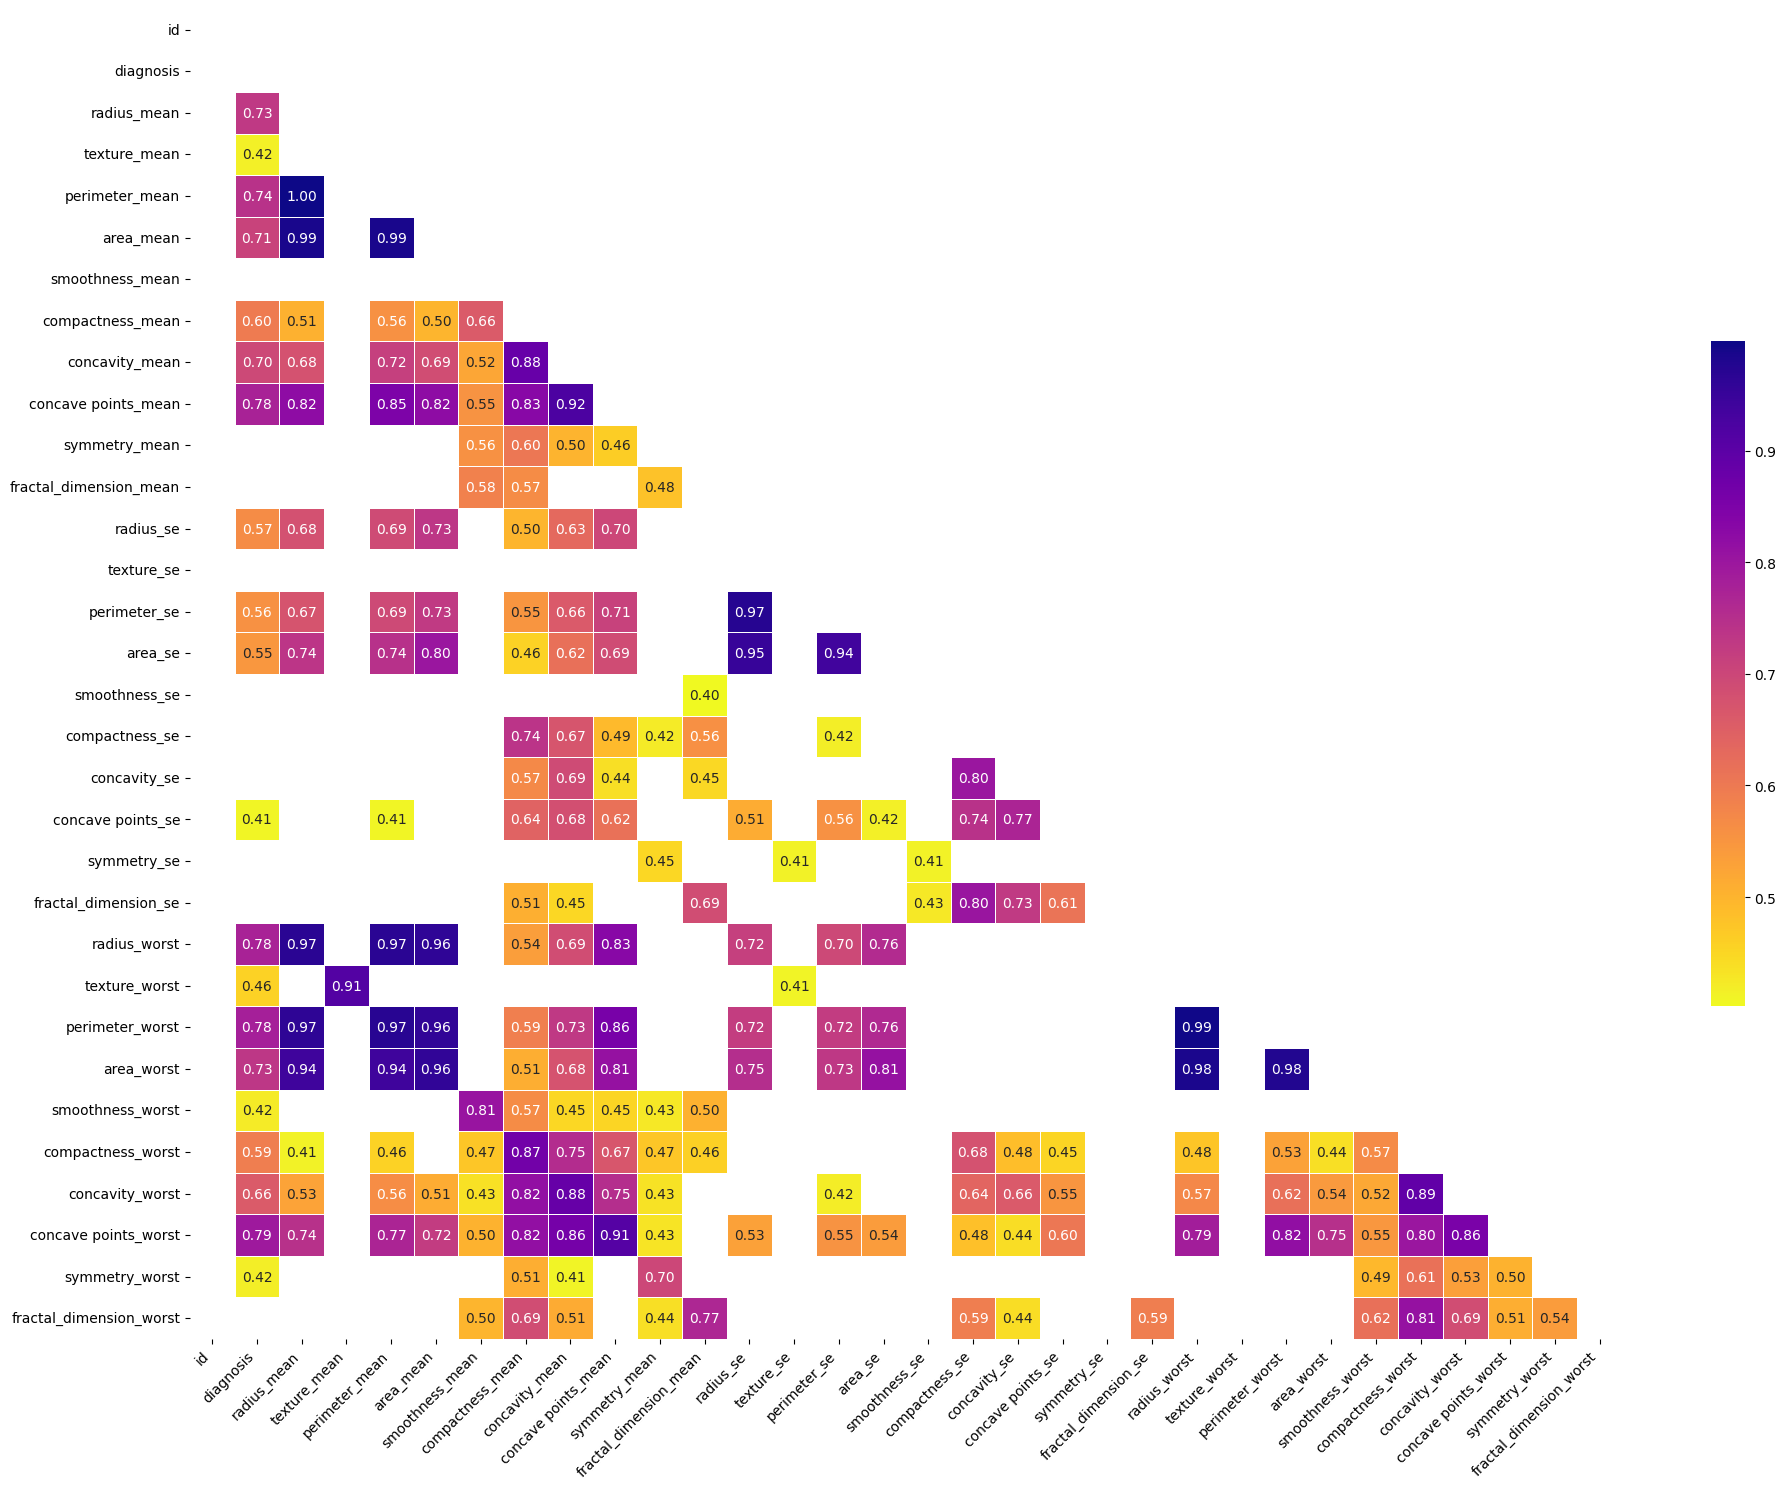



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



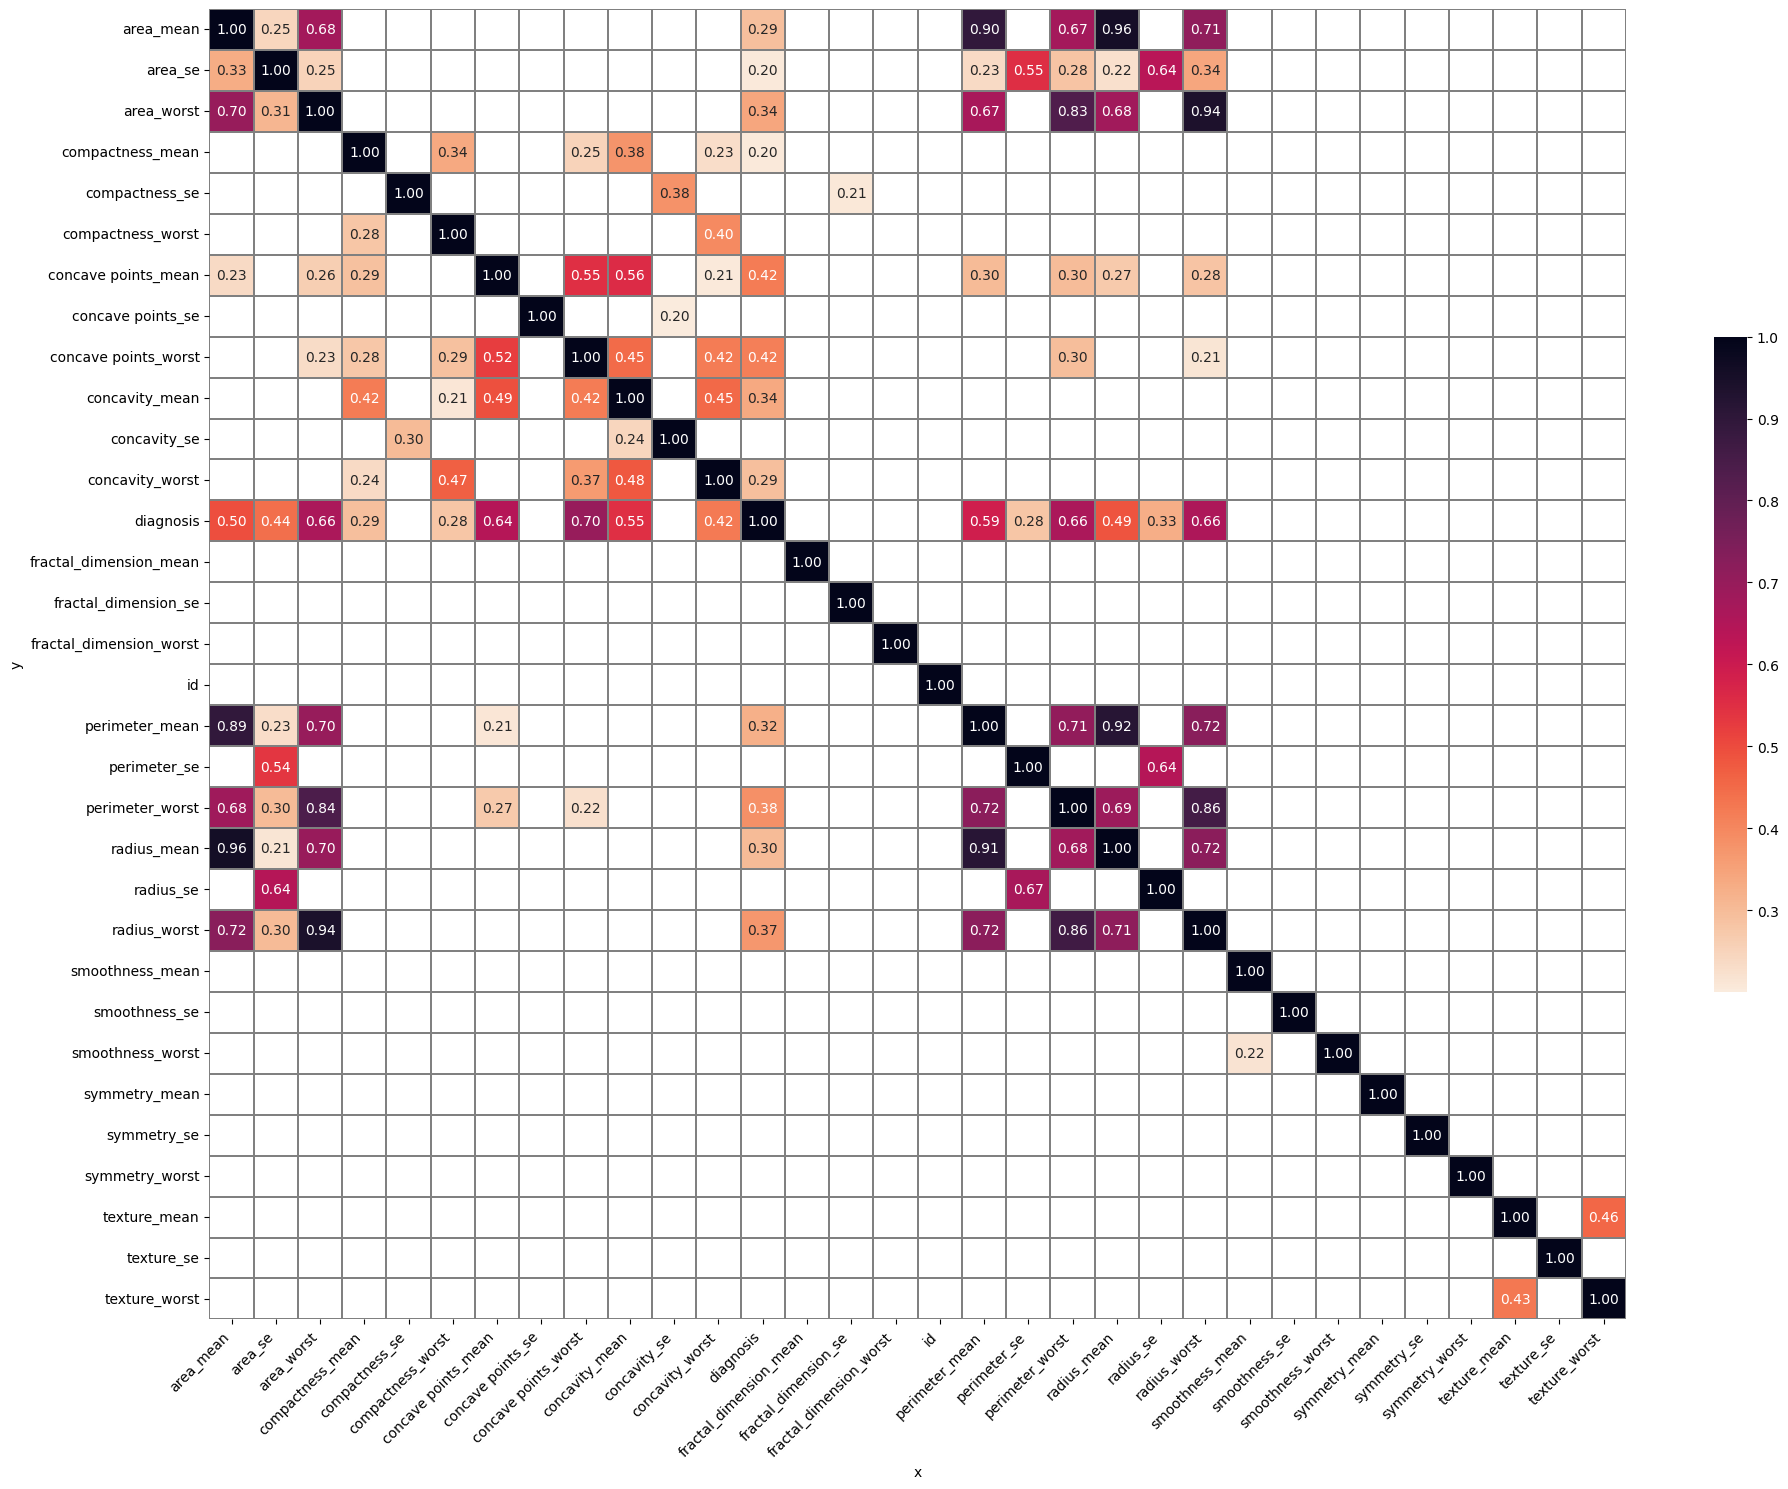

In [11]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                df_corr_spearman = df_corr_spearman, 
                pps_matrix = pps_matrix,
                CorrThreshold = 0.4, PPS_Threshold =0.2,
                figsize=(20,15), font_annot=10)

## Dataset Analysis

### Correlation and Power Predictive Score (PPS) Analysis

The data presented in the spearman and pearson reports and PPS matrix shows that -
* The worst (largest) values of radius, texture, area and perimeter correlate highly with their own mean values, not only reciprocally but also amongst each other.
* The correlativity among the mean and worst values of concave variables are very high.
* Nearly all of the variables show correlations of some sort, weak or strong. So for our future ML cases its better to retain them.

## Data Cleaning

### Assess missing data levels

In [12]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [13]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                "PercentageOfDataset": missing_data_percentage,
                                "DataType": df.dtypes}
                                    )
                        .sort_values(by=['PercentageOfDataset'], ascending=False)
                        .query("PercentageOfDataset > 0")
                        )

    return df_missing_data

In [14]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType


* Again, we confirm that there are no variables with missing data, so we can procede onto the next step.

### Data Cleaning Spreadsheet Summary

### Data Cleaning Summary

* We will split the dataset into train and test sets, the train set containing 80% of the total dataset and the test set containing 20%.

* We will take the **Drop Variables** imputation approach and drop `id` variable from our train and test sets.

### Split Train and Test Set

In [15]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['diagnosis'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (455, 32) 
TestSet shape: (114, 32)


### Drop Variables


* Step 1: imputation approach: Drop Variables
* Step 2: Select variables to apply the imputation approach

In [16]:
variables_method = ['id' ]

print(f"* {len(variables_method)} variables to drop \n\n"
    f"{variables_method}")

* 1 variables to drop 

['id']


* We are dropping `id` since it is a unique identifier for each patient, it doesn't add any relevant value to our diagnosis prediction.

* Step 3: Create a separate DataFrame applying this imputation approach to the selected variables.

In [17]:
from feature_engine.selection import DropFeatures
imputer = DropFeatures(features_to_drop=variables_method)
imputer.fit(TrainSet)
df_method = imputer.transform(TrainSet)

* Step 4: Assess the effect on the variable's distribution.

In this case, there is no effect on the distribution of the variable, since we are not removing rows, but columns. 

* Step 5: Apply the transformation to our data.

In [18]:
from feature_engine.selection import DropFeatures
imputer = DropFeatures(features_to_drop=variables_method)
imputer.fit(TrainSet)

TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

* Step 6: Conclude the data cleaning process with dataset assesment.

In [19]:
TrainSet.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,0,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,...,11.16,26.84,71.98,384.0,0.1402,0.1402,0.1055,0.06499,0.2894,0.07664
427,0,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,...,12.76,32.04,83.69,489.5,0.1303,0.1696,0.1927,0.07485,0.2965,0.07662
406,0,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,...,17.71,19.58,115.90,947.9,0.1206,0.1722,0.2310,0.11290,0.2778,0.07012


In [20]:
TestSet.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,1,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,16.41,29.66,113.30,844.4,0.1574,0.3856,0.5106,0.20510,0.3585,0.11090
457,0,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.1390,0.06005,0.2444,0.06788
439,0,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,...,14.91,19.31,96.53,688.9,0.1034,0.1017,0.0626,0.08216,0.2136,0.06710


---

# Push files to Repo

In [21]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') # create outputs/datasets/cleaned folder
except Exception as e:
  print(e)


### Saving the Train Set

In [22]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

### Saving the Test Set

In [23]:
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)

Being satisfied with our data cleaning process, we save the Train and Test dataset and move onto the Feature Engineering process.